In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#Descargar los datos experimentales
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv"
data = pd.read_csv(url)

In [2]:
#Filtrar los datos para angle = 30
angle = 30
filtered_data = data[data['angle'] == angle]

In [3]:
#Definir el modelo físico
def model(params, h, latitude, g):
    p = params[0]
    return ((2 * np.sqrt(2)) / 3) * p * np.cos(latitude) * np.sqrt(h ** 3 / g)

In [4]:
#Definir la función χ2
def chi_square(params, h, y, sigmay, latitude, g):
    p = params[0]
    y_model = model(params, h, latitude, g)
    diff = (y - y_model) / sigmay
    return np.sum(diff ** 2)

In [5]:
#Minimizar usando optimize.minimize
latitude = np.radians(30)
g = 9.81
h_values = filtered_data['h'].values
y_values = filtered_data['y'].values
sigmay_values = filtered_data['sigmay'].values

params_initial = [1e-5]  # Valor inicial para el parámetro p

result = optimize.minimize(chi_square, params_initial, args=(h_values, y_values, sigmay_values, latitude, g))

p_optimal = result.x[0]

#Imprimir el valor de p_optimal (ω)
print("El valor de ω es:", p_optimal)

El valor de ω es: 7.243998213777981e-05


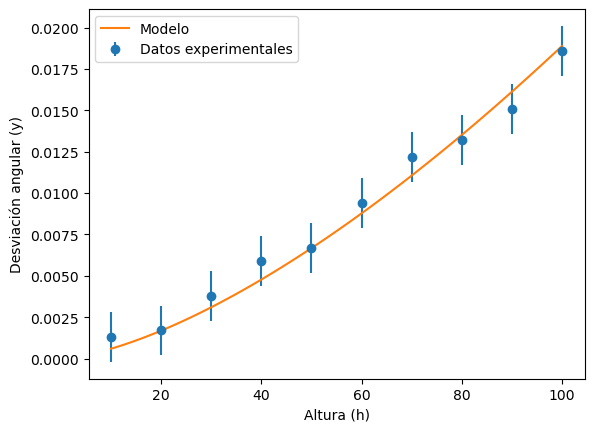

In [6]:
#Dibujar los datos y el modelo
h_range = np.linspace(h_values.min(), h_values.max(), 100)
plt.errorbar(h_values, y_values, yerr=sigmay_values, fmt='o', label='Datos experimentales')
plt.plot(h_range, model([p_optimal], h_range, latitude, g), label='Modelo')
plt.xlabel('Altura (h)')
plt.ylabel('Desviación angular (y)')
plt.legend()
plt.show()

In [7]:
N = 300
Gravedad = np.array([])
for i in range(N):
     Gravedad = np.append(9.81 + np.random.normal(loc=0,scale=1),Gravedad)

In [8]:
def get_optimal_omega(h_values, y_values, sigmay_values, latitude, g):
    params_initial = [1e-5]  # Valor inicial para el parámetro p
    result = optimize.minimize(chi_square, params_initial, args=(h_values, y_values, sigmay_values, latitude, g))
    p_optimal = result.x[0]
    return p_optimal

modified_y_values = np.zeros_like(y_values)
Omega = np.zeros(N)
for i in range(N):
    modified_y_values = y_values + np.random.normal(loc=0, scale=sigmay_values[0], size=len(y_values))

    # Paso (e): Realizar la optimización y guardar el valor de ω estimado
    Omega[i] = get_optimal_omega(h_values, modified_y_values, sigmay_values, latitude, Gravedad[i])

# Paso (f): Generar la distribución conjunta f(ω, g)
H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(30,30))

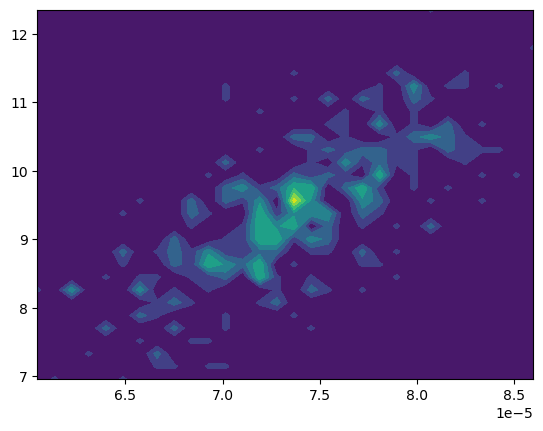

In [9]:
plt.contourf(H2,extent = (Omega.min(),Omega.max(),Gravedad.min(),Gravedad.max()))
plt.show()

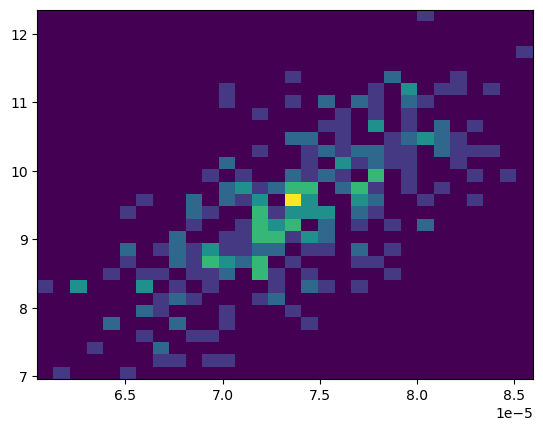

In [10]:
plt.imshow(H2,origin='lower',aspect = 'auto',extent = (Omega.min(),Omega.max(),Gravedad.min(),Gravedad.max()))

In [11]:
print("Si hay una correlación positiva. El valor de Omega aumenta ligeramente a medida que aumenta el valor de la Gravedad.")

Si hay una correlación positiva. El valor de Omega aumenta ligeramente a medida que aumenta el valor de la Gravedad.


In [12]:
H1 = np.sum(H2,axis=1)
mid_bins = 0.5*(binsx[1:]+binsx[:-1])

In [13]:
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )
ij,ii,ji

(5, 15, 24)

In [14]:
print(mid_bins[ij].round(7),mid_bins[ii],mid_bins[ji])

6.52e-05 7.365996041328697e-05 8.131640881517272e-05


In [15]:
def datos(table):
    h = table.h
    angle = table.angle
    y = table.y
    sigmay = table.sigmay

    angle = angle*np.pi/180
    
    N = 300
    Gravedad = np.array([])
    for i in range(N):
         Gravedad = np.append(9.81 + np.random.normal(loc=0,scale=1),Gravedad)
            
    modified_y_values = np.zeros_like(y_values)
    Omega = np.zeros(N)
    for i in range(N):
        modified_y_values = y_values + np.random.normal(loc=0, scale=sigmay_values[0], size=len(y_values))

        Omega[i] = get_optimal_omega(h_values, modified_y_values, sigmay_values, latitude, Gravedad[i])
        
    H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(30,30))   
    H1 = np.sum(H2,axis=1)
    mid_bins = 0.5*(binsx[1:]+binsx[:-1])

    
    cs = np.cumsum(H1)
    ij = np.searchsorted( cs, np.percentile(cs,16) )
    ii = np.searchsorted( cs, np.percentile(cs,50) )
    ji = np.searchsorted( cs, np.percentile(cs,84) )
    
    sigma = np.std(Omega)

    return(mid_bins[ij].round(7),mid_bins[ii].round(7),mid_bins[ji].round(7), sigma,Omega)
    

In [16]:
table10 = data[(data.angle == 10)]
table20 = data[(data.angle == 20)]
table30 = data[(data.angle == 30)]
table40 = data[(data.angle == 40)]
table50 = data[(data.angle == 50)]
table60 = data[(data.angle == 60)]
min10,mid10,max10,sigma10,Omega10 = datos(table10)
min20,mid20,max20,sigma20,Omega20 = datos(table20)
min30,mid30,max30,sigma30,Omega30 = datos(table30)
min40,mid40,max40,sigma40,Omega40 = datos(table40)
min50,mid50,max50,sigma50,Omega50 = datos(table50)
min60,mid60,max60,sigma60,Omega60 = datos(table60)
minCom,midCom,maxCom,sigmaCom,OmegaCom =datos(data)

In [17]:
tablafinal = {
    '\u03BB':['10','20','30','40','50','60','Combinado'],
    '\u03C9':[mid10,mid20,mid30,mid40,mid50,mid60,midCom],
    'IC 68%':[[min10,max10],[min20,max20],[min30,max30],[min40,max40],[min50,max50],[min60,max60],[minCom,maxCom]],
    'ErrorR':[(sigma10/mid10).round(3),(sigma20/mid20).round(3),(sigma30/mid30).round(3),(sigma40/mid40).round(3),(sigma50/mid50).round(3),(sigma60/mid60).round(3), (sigmaCom/midCom).round(3)]
}

pd.set_option('display.float_format', '{:.4g}'.format)
dataframe = pd.DataFrame(tablafinal)
print(dataframe)

           λ        ω                IC 68%  ErrorR
0         10 7.51e-05  [6.44e-05, 8.47e-05]    0.07
1         20 7.29e-05  [6.35e-05, 8.23e-05]   0.071
2         30 7.48e-05  [6.36e-05, 8.49e-05]   0.069
3         40 7.33e-05  [6.53e-05, 8.13e-05]   0.064
4         50  7.4e-05  [6.54e-05, 8.26e-05]   0.062
5         60 7.38e-05   [6.37e-05, 8.4e-05]    0.07
6  Combinado 7.43e-05  [6.48e-05, 8.37e-05]   0.066


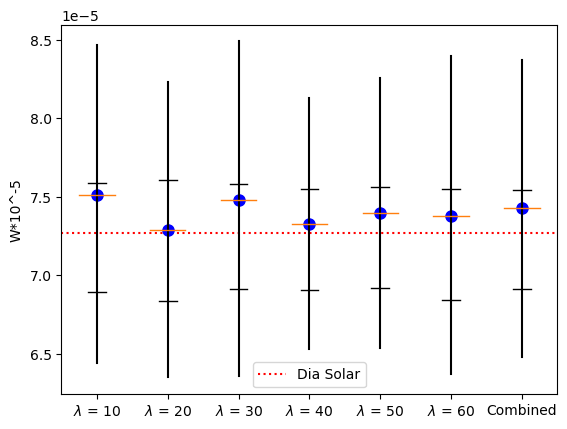

In [18]:
labels_ = ['$\lambda$ = 10', '$\lambda$ = 20', '$\lambda$ = 30', '$\lambda$ = 40', '$\lambda$ = 50', '$\lambda$ = 60', 'Combined']
conf_intervals_ = [[min10, max10], [min20, max20], [min30, max30], [min40, max40], [min50, max50], [min60, max60], [minCom, maxCom]]
medians = [mid10, mid20, mid30, mid40, mid50, mid60, midCom]

dataset = [Omega10, Omega20, Omega30, Omega40, Omega50, Omega60, OmegaCom]

plt.boxplot(dataset, labels=labels_, usermedians=medians, conf_intervals=conf_intervals_, showbox=False, showfliers=False, whis=0., showcaps=True)

plt.axhline(7.27e-5, color='red', linestyle='dotted',label='Dia Solar')

for i, (label, interval) in enumerate(zip(labels_, conf_intervals_)):
    x = i + 1
    y_min, y_max = interval
    plt.plot([x], [medians[i]], marker='o', markersize=8, color='blue')  # Cambio de línea a círculo
    plt.plot([x, x], [y_min, y_max], color='black')
plt.ylabel('W*10^-5')
plt.legend()
plt.show()